## Introduction

- **Context:**  
  The American economy is highly interconnected: industries both consume inputs from and provide outputs to each other. For example, agriculture relies on energy, while energy relies on manufacturing. Wassily Leontief developed the *input–output model* to capture these interdependencies using matrices.  

- **Research Question:**  
  What does the BEA input–output requirements matrix reveal about inter-industry dependencies in the U.S. economy?  

- **Data:**  
 The dataset used is “Total Requirements, Industry-by-Industry Summary Level” from the U.S. Bureau of Economic Analysis (BEA).  
  Source: [BEA Interactive Tables](https://apps.bea.gov/iTable/?reqid=1602&step=2&Categories=Core&isURI=1&_gl=1*rffd5b*_ga*OTc0NjMwNDI2LjE3NTgyNzg4NzI.*_ga_J4698JNNFT*czE3NTgyNzg4NzIkbzEkZzEkdDE3NTgyNzg5MzUkajU5JGwwJGgw#eyJhcHBpZCI6MTYwMiwic3RlcHMiOlsxLDIsMyw0XSwiZGF0YSI6W1siY2F0ZWdvcmllcyIsIkNvcmUiXSxbIlRhYmxlX0xpc3QiLCJJeElUUkFSIl0sWyJSYkRldGFpbEx2bCIsIlNVTSJdXX0=).  
  This dataset provides a square matrix where each cell represents how much input from one industry is required to produce one unit of output in another industry.


## Simple data exploration

- Step 1: Load the CSV file and remove metadata rows.  
- Step 2: Show the shape of the dataset (15×15 matrix).  
- Step 3: Display a small preview (a few industries × a few requirements).  
- Step 4: Briefly describe what the numbers mean: larger values = stronger dependence of one industry on another.  

# Visualization: Heatmap of Inter-Industry Dependencies

- **Explain what you show, might require math:**  
  The dataset can be represented as a square matrix \(A\).  
  - Rows = industries supplying inputs.  
  - Columns = industries demanding outputs.  
  - Entries \(a_{ij}\) = how much input from industry \(i\) is required to produce one unit of industry \(j\)’s output.
 
  Each cell in the matrix represents how much input from industry i is required to produce one unit of output in industry j.

  A heatmap provides a visual way to interpret these interdependencies. Darker cells indicate stronger dependence between industries.

- **Show:**  
  A heatmap of the entire 15×15 BEA requirements matrix.
## Conclusion

- **Key insight:** The visualization of the Leontief input–output matrix allows us to see how industries depend on one another, transforming complex economic relationships into a clear, interpretable structure.  
- This project demonstrates how linear algebra, through matrix representation, can be used to analyze real-world economic systems. 


In [3]:
#This cell loads the BEA input–output dataset into a pandas DataFrame.
#We skip the first three metadata rows so only the actual data is read.
#Then we preview the first column names and rows to check the structure of the dataset and see how industries and their requirements are represented.

import pandas as pd

df = pd.read_csv("Leontief_Matrix.csv", skiprows=3)

print(df.columns[:10])   # check first 10 columns
print(df.head(3))        # preview first 3 rows


Index(['Unnamed: 0', 'Industries/Industries', '111CA', '113FF', '211', '212',
       '213', '22', '23', '321'],
      dtype='object')
  Unnamed: 0                      Industries/Industries      111CA  \
0        NaN                       Industry Description      Farms   
1      111CA                                      Farms  1.3132842   
2      113FF  Forestry, fishing, and related activities  0.0666451   

                                       113FF                     211  \
0  Forestry, fishing, and related activities  Oil and gas extraction   
1                                  0.0206013               0.0015034   
2                                  1.1334592               0.0004430   

                          212                            213         22  \
0  Mining, except oil and gas  Support activities for mining  Utilities   
1                   0.0018934                      0.0009769  0.0007687   
2                   0.0020773                      0.0005396  0.0003661

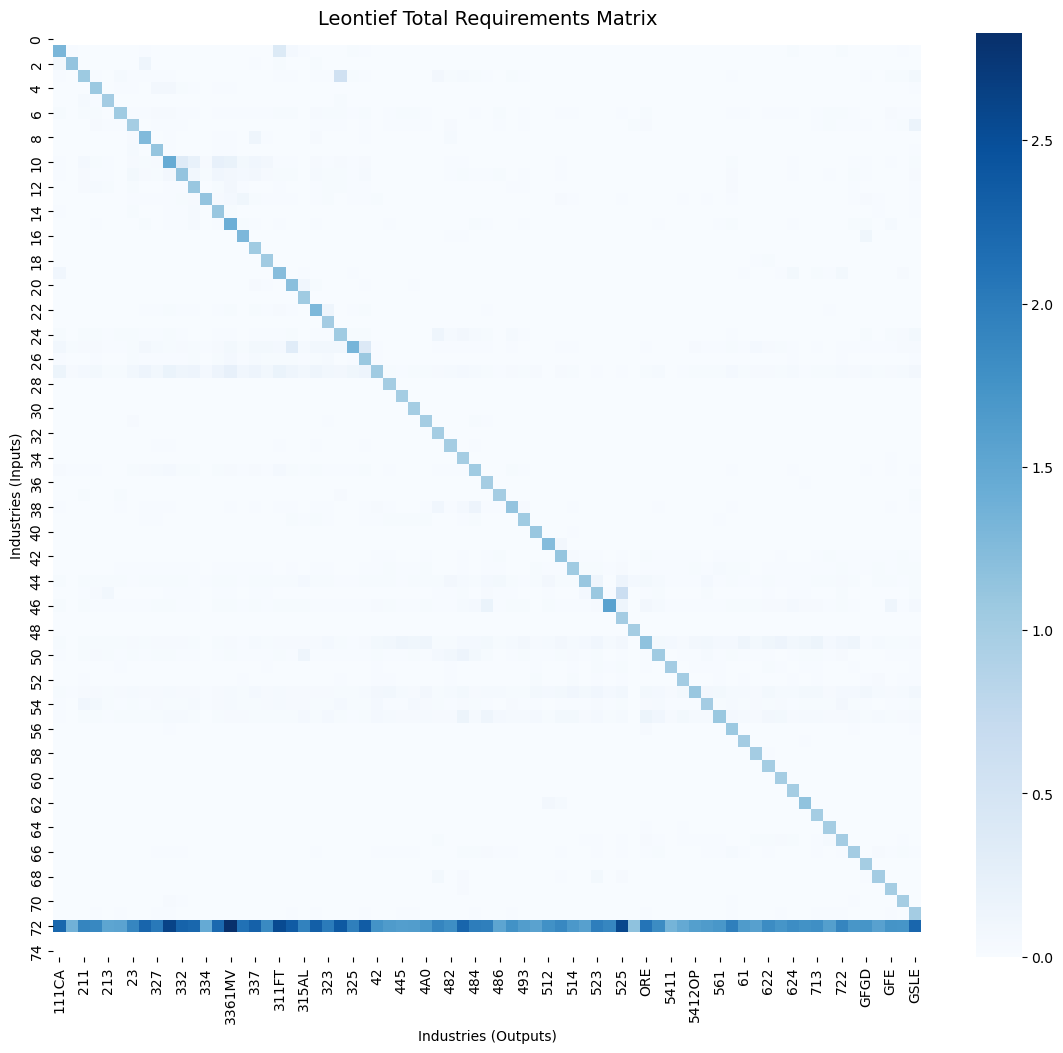

In [5]:
# | label: fig-label-to-make-reference
# | fig-cap: "Heatmap of Industries in the CSV file"
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read CSV (skip metadata rows)
df = pd.read_csv("Leontief_Matrix.csv", skiprows=3)

# Drop the first two identifier columns: industry code + description
matrix = df.drop(columns=[df.columns[0], df.columns[1]])

# Make sure everything is numeric
matrix = matrix.apply(pd.to_numeric, errors="coerce")

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(matrix, cmap="Blues", cbar=True)
plt.title("Leontief Total Requirements Matrix", fontsize=14)
plt.xlabel("Industries (Outputs)")
plt.ylabel("Industries (Inputs)")
plt.show()


@fig-label-to-make-reference Heatmap of Industries

- The heatmap represents the BEA input–output requirements matrix, where each cell shows how much input from one industry (on the y-axis) is required to produce one unit of output in another industry (on the x-axis). The diagonal is the darkest part of the heatmap, which means that industries tend to rely most heavily on themselves. For example, agriculture uses many agricultural products, and manufacturing depends heavily on its own processes. However, the heatmap also reveals off-diagonal patterns that highlight cross-industry dependencies. The dark blue band along row 72, which corresponds to the “Accommodation and Food Services” industry is used heavily by many other industries. The fact that this row is dark across many columns means that food and lodging services are used as inputs by a wide range of other industries. This makes sense, because almost every sector of the economy all the way from construction, to government, to transportation, all require food services or accommodation in some form to support workers, projects, or operations. In other words, Industry 72 acts as a “support industry” that contributes broadly across the economy rather than being tied to just one or two sectors. Overall, the heatmap shows both self-sufficiency (strong diagonal) and interdependence (bands like Industry 72), making it clear that the U.S. economy functions as a web of interconnected industries.

